In [1]:
%matplotlib inline
# !pip install qiskit==0.45.0 qiskit-aer --force-reinstallabs

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

<center><h1>Quantum Computing: Foundations and Practical Simulations</h1></center>

![quantum_computing_image](https://physicsworld.com/wp-content/uploads/2020/11/quantum-computing-or-comms-1008154320-iStock_johnason.jpg)

Dear Reader,

Welcome to this exploration of Quantum Computing.

This article was created with the aim of demystifying the fundamental concepts of quantum computing while also offering a hands-on look at how they are applied in practice. Whether you're just starting your journey into quantum theory or looking to deepen your understanding through simulation, I hope you find this work both accessible and insightful.

You’ll find a blend of:
- Clear explanations of core quantum principles (like superposition, entanglement, and gates)
- Practical simulations using tools like Qiskit or other platforms
- Thought-provoking examples that bridge theory and application

I encourage you to approach this material with curiosity and experimentation. Quantum computing is not just a new type of computation - it's a new way of thinking.

Thank you for reading, and I hope this project sparks your interest in the quantum world.

Warm regards,  
Nikolay Shivachev

|Table of Contents                   |
|------------------------------------|
|1. Introduction                     |
|2. Problem Statement                |
|3. Fundamental concepts and Math    |
|4. Quantum Circuits with Qiskit     |
|5. Deutsch-Jozsa Algorithm          |
|6. Applications of Quantum Computing|
|7. Discussion & Limitations         |
|8. Conclusion & Next Steps          |
|9. References                       |

### 1. Introduction

Quantum computing is a new approach to calculation that uses principles of fundamental physics to solve extremely complex problems very quickly.

Flip a coin. Heads or tails, right? Sure, once we see how the coin lands. But while the coin is still spinning in the air, it's neither heads nor tails, it’s some probability of both.

This gray area is the simplified foundation of quantum computing.

For decades, digital computers have been making it easier and easier for us to process information. But quantum computers, a fundamentally different approach, are poised to take computing to a whole new level. Quantum computers have the potential to solve very complex statistical problems that are well beyond the limits of today’s computers, across a range of industries and applications, including finance, transportation, pharmaceuticals, and green technology.

Classical computing, the technology that powers your laptop and smartphone, is built on bits. A bit is a unit of information that can store either a zero or a one. By contrast, quantum computing is built on quantum bits, or qubits, which can store both zeros and ones. Qubits can represent any combination of both zero and one simultaneously. This is called superposition, and it is a basic feature of any quantum state. When a qubit's subatomic particles are in a superposition state, each subatomic particle can interact with and influence others, a phenomenon called quantum interference. Quantum chips make up the physical hardware that stores qubits, similar to microchips in classical computers.

When a classical computer uses multiple variables to solve a problem, it must conduct a new calculation every time one of those variables changes. Each calculation is a single path to a single result. Quantum computers, on the other hand, can explore many paths in parallel through superposition.

Additionally, qubits can interact with one another through a phenomenon known as entanglement. Entanglement allows qubits to scale exponentially. Two qubits, for example, can store and process four bits of information, three can process eight, and so on. This exponential scaling gives quantum computers much more power than classical computers.

Quantum computing leverages the principles of quantum mechanics to solve problems beyond the capabilities of classical computers. At its core, quantum computing works with qubits, which can represent 0, 1, or a superposition of both. This opens the door to exponentially faster computations in some domains like cryptography, optimization, and quantum simulations.

### 2. Problem Statement

Classical computers cannot efficiently simulate quantum systems due to exponential growth in complexity. Quantum computers promise to address this with fundamentally different computation. We aim to:
- Understand quantum logic gates and qubit operations
- Simulate a simple quantum algorithm (Deutsch-Jozsa)
- Analyze the difference in approach and result from classical algorithms

### 3. Fundamental concepts and Math

#### Qubit

Generally, qubits are created by manipulating and measuring quantum particles (the smallest known building blocks of the physical universe), such as photons, electrons, trapped ions and atoms. Qubits can also engineer systems that behave like a quantum particle, as in superconducting circuits.

To manipulate such particles, qubits must be kept extremely cold to minimize noise and prevent them from providing inaccurate results or errors resulting from unintended decoherence.

When processing a complex problem, such as factoring large numbers, classical bits become bound up by holding large quantities of information. Quantum bits behave differently. Because qubits can hold a **[superposition](#Superposition)**, a quantum computer that uses qubits can approach the problem in ways different from classical computers.

As a helpful analogy for understanding how quantum computers use qubits to solve complicated problems, imagine you are standing in the center of a complicated maze. To escape the maze, a traditional computer would have to "brute force" the problem, trying every possible combination of paths to find the exit. This kind of computer would use bits to explore new paths and remember which ones are dead ends.

Comparatively, a quantum computer might derive a bird’s-eye view of the maze, testing multiple paths simultaneously and using **[quantum interference](https://www.techtarget.com/whatis/definition/quantum-interference)** to reveal the correct solution. However, qubits don't test multiple paths at once, instead, quantum computers measure the probability amplitudes of qubits to determine an outcome. These amplitudes function like waves, overlapping and interfering with each other. When asynchronous waves overlap, it effectively eliminates possible solutions to complex problems, and the realized coherent wave or waves present the solution. In simple term when the waves (amplitudes) are out of sync, they cancel each other -> wrong answers disappear. When they're in sync, they reinforce each other -> the right answer becomes stronger.

Like water waves: If two waves crash into each other perfectly, they can make a big wave (correct answer). If they crash out of sync, they flatten out (wrong answers vanish).


That we have tried to gain a general idea of what is qubit and its properties, let's now look at it from the perspective of linear algebra.

*Is it starting to sound scary*😬 *Don't worry will try to explain it in a simple way, step by step*😉

![qubit_image](https://cdn.vectorstock.com/i/500p/37/66/qubit-concept-representation-visualization-vector-40313766.jpg)

To describe superposition, interference, and quantum operations using the mathematical language of linear algebra and complex numbers,  quantum bit is represented as a vector in a 2D complex vector space:

$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle, \ \text{with } |\alpha|^2 + |\beta|^2 = 1 $$

What does this mean?

**A Qubit is a Unit of Quantum Information**
- Just like a classical bit is either 0 or 1,
- A **qubit** can be in a **superposition** of both states

**Vector in a 2D Complex Vector Space**

Mathematically, a qubit is written as: 
$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle $$

- $\lvert 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

- $\lvert 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$
- $\alpha, \beta \in \mathbb{C}$ (complex numbers), define the **probability amplitudes** for the qubit being in $\lvert 0 \rangle$ or  $\lvert 1 \rangle$ 
- Must satisfy: $|\alpha|^2 + |\beta|^2 = 1$

So the qubit is a **vector**:
$$
\lvert \psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}
$$

**2D complex vector space**
- 2D = the qubit is represented using two components (amplitudes for $\lvert 0 \rangle$ and $\lvert 1 \rangle$)
- Complex = those amplitudes can be complex numbers

**What this lets us do**
- We can represent **superposition**: a mix of 0 and 1
- We can use **quantum gates** as matrix operations on these vectors
- The state evolves according to **linear algebra**

*Having learned so much about qubits, let's move on how to manipulate them*😉

We are able to manupulate qubits with help of the quantum gates:

#### Quantum Gates

Quantum gates are the basic building blocks of quantum circuits, similar to how logic gates (AND, OR, NOT) are for classical circuits.
- They are **operations** that manipulate the **state of qubits**
- Each gate performs a **unitary transformation** on the qubit(s), meaning it changes the state while preserving the total probability (the operation is reversible)

**How Quantum Gates Work?**
- Quantum gates act on one or more qubits
- They transform the qubits **complex probability amplitudes**
- Because qubit states are vectors in a complex vector space (Hilbert space), quantum gates correspond to **unitary matrices** acting on those vectors

| Gate     | Matrix                                                           |
| -------- | -----------------------------------------------------------------|
| Pauli-X  | $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$                   |
| Hadamard | $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$|
| CNOT     | Acts on two qubits to flip the second if the first is $|1\rangle$|

**Key Properties**
- **Reversible:** Unlike classical logic gates, quantum gates are reversible because they are unitary
- **Operate on probability amplitudes:** They don’t just flip bits but transform the amplitudes that define the qubit state
- **Enable quantum algorithms:** Combinations of gates build quantum circuits that run algorithms like Grover's, Shor’s, etc.

Applying quantum gates to qubits can result in **superposition** and **entanglement**, depending on the type of gate and how it's used.

- Superposition is created by single-qubit gates like the Hadamard gate
- Entanglement is created by multi-qubit gates like CNOT, often after creating superposition

Let's explain them in more details:

#### Superposition

A [qubit](#Qubit) itself isn't very useful, but it can place the quantum information it holds into a state of superposition, which represents a combination of all possible configurations of the qubit. Groups of qubits in superposition can create complex, multidimensional computational spaces. Complex problems can be represented in new ways in these spaces.

This superposition of qubits gives quantum computers their inherent parallelism, allowing them to process many inputs simultaneously.

In classical computing, a bit is either 0 or 1. In quantum computing, a qubit can be in a superposition of both states simultaneously. The **Hadamard gate** is one of the primary ways to **create superposition in a qubit**. It is a single-qubit gate that creates superposition from a basis state. It changes a definite state into a **balanced mix** of both basis states.

**The Hadamard gate transforms:**

- Start with a qubit in a definite basis state, usually $|0\rangle$
- Apply the Hadamard gate $H$
- The qubit transforms into an equal superposition of $|0\rangle$ and $|1\rangle$ 

Hadamard Gate Matrix:
$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Basis Vectors:
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Apply $H$ to $\lvert 0\rangle$:
$$H|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \cdot 1 + 1 \cdot 0 \\ 1 \cdot 1 + (-1) \cdot 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

Apply $H$ to $\lvert 1\rangle$:
$$H|1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \cdot 0 + 1 \cdot 1 \\ 1 \cdot 0 + (-1) \cdot 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$$

Then:
$$ H \lvert 0\rangle = \frac{1}{\sqrt{2}} (\lvert 0\rangle + \lvert 1\rangle), \ H \lvert 1\rangle = \frac{1}{\sqrt{2}} (\lvert 0\rangle - \lvert 1\rangle) $$

Measurement result will be: $\lvert 0 \rangle$ 50% of the time, $\lvert 1 \rangle$ 50% of the time.

$H \lvert 0\rangle$:
$$P(0) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$
$$P(1) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$

Еquivalent for $H \lvert 1\rangle$, but:
$$P(1) = \left|-\frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2} = 50\%$$

The Hadamard gate is used to put qubits into superposition, enabling quantum parallelism and interference - the core features that give quantum computers their power.

Now let's continue with one of the most weirdest phenomena in the realm of quantum mechanics.

#### Entanglement

Entanglement is a quantum phenomenon where **two or more qubits become linked** such that the state of one **instantly affects** the state of the other(s), no matter how far apart they are.

*It's pretty cool, Isn't it*😮

Entanglement is the ability of qubits to correlate their state with other qubits. Entangled systems are so intrinsically linked that when quantum processors measure a single entangled qubit, they can immediately determine information about other qubits in the entangled system.

When a quantum system is measured, its state collapses from a superposition of possibilities into a binary state, which can be registered like binary code as either a zero or a one.

Two qubits can be entangled such that their states are not independent:

$$\lvert \psi \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$

- This is an **entangled state** known as a **Bell state**
- We **cannot write** this as the product of two individual qubit states
- If we measure the first qubit and find $|0\rangle$, the second **must** be $|0\rangle$ 
- If we get $|1\rangle$ from the first, the second must be $|1\rangle$
- But until we measure, both outcomes are equally possible

**How Entanglement is Created?**

Typically using quantum gates:
- Start with two qubits in $|0\rangle$:
$$|00\rangle$$
- Apply a **Hadamard gate** to the first qubit:
$$\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) |0\rangle$$ 
- Then apply a **CNOT gate**, with the first qubit as control and second as target:
$$\rightarrow \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$

 
**Entanglement enables:**
- Quantum teleportation (transfering of a qubit's state from one location to anotherr, without physically moving the qubit itself)
- Quantum key distribution (secure communication)
- Speedups in quantum algorithms (like Grover’s and Shor’s)
- Error correction in quantum computers

To help understand how a qubit's state is made we will visualizes quantum amplitudes as complex vectors.

Here, both $\alpha$ and $\beta$ are complex numbers. The following code plots them as vectors in the complex plane.

**Complex amplitudes of a single qubit's quantum state visualization**

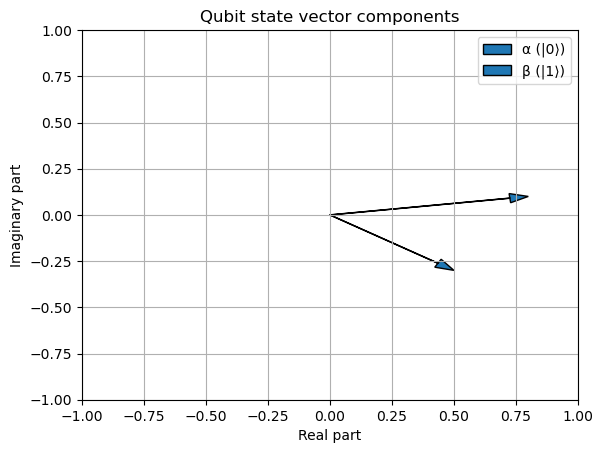

In [8]:
# Example amplitudes for the qubit state
alpha = 0.8 + 0.1j
beta = 0.5 - 0.3j

# Extract Real and Imaginary Parts
vectors = np.array([[alpha.real, alpha.imag],
                    [beta.real, beta.imag]])

# Labels for components
labels = ['α (|0⟩)', 'β (|1⟩)']

fig, ax = plt.subplots()

# Plot arrows from origin (0,0)
for i, vec in enumerate(vectors):
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.05, length_includes_head=True, label=labels[i])

# Set axis labels and limits
ax.set_xlabel('Real part')
ax.set_ylabel('Imaginary part')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True)
ax.legend()
ax.set_title('Qubit state vector components')

plt.show()


**2D plot showing:**
- A vector pointing to `(0.8, 0.1)` - $\alpha$ (the amplitude of $|0\rangle$)
- A vector pointing to `(0.5, -0.3)` - $\beta$ (the amplitude of  $|1\rangle$)
- X-axis = real part, Y-axis = imaginary part

Each vector represents one part of the qubit's superposition, visualized in the complex plane.

To achieve a real, practical understanding of how quantum information behaves and sets the foundation for building powerful quantum algorithms in the next part will be demonstrated quantum superposition and measurement outcomes.

### 4. Quantum Circuits with Qiskit

The example above demonstrates basic quantum randomness from a single qubit in superposition as:
- Creates a simple 1-qubit circuit
- Applies a Hadamard gate to create superposition
- Measures the qubit
- Runs the experiment many times on a simulator
- And then plots the distribution of measurement outcomes

**Create a basic quantum circuit**

In [11]:
qc = QuantumCircuit(1, 1) # Creates a quantum circuit with 1 qubit and 1 classical bit
qc.h(0)  # Applies the Hadamard gate to qubit 0, puts the qubit into a superposition
qc.measure(0, 0) # Measures qubit 0 and stores the result in classical bit 0
fig = qc.draw(output='mpl', style='clifford') # Assign to a variable and control display

**Simulate and visualize**

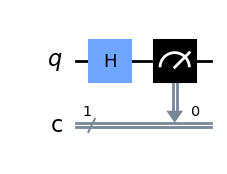

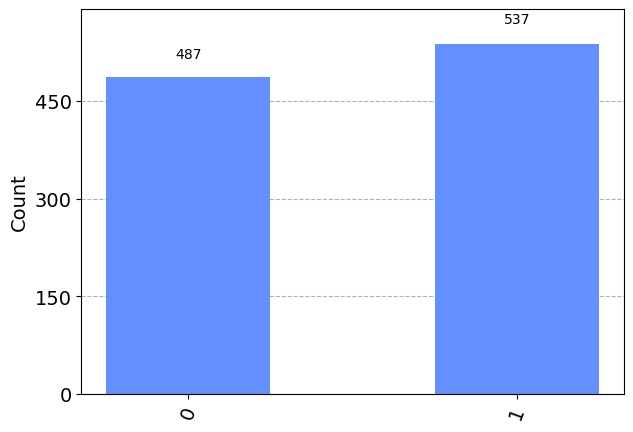

In [13]:
simulator = Aer.get_backend('qasm_simulator') # Simulates running the quantum circuit and measuring it many times
result = execute(qc, backend=simulator, shots=1024).result() # Repeating the experiment 1024 times
counts = result.get_counts() # Extract how many times each outcome was measured
plot_histogram(counts) # Plot the measurement results as a histogram
plt.show() # Displays whatever Matplotlib figure was last created

We see approximately **50% of the measurements are '0'** and **50% are '1'**, reflecting the equal probabilities from the **Hadamard superposition**.

- Before measurement: the qubit is in a superposition
- After measurement: we collapse it to 0 or 1
- Repeating 1024 times lets us see the quantum randomness statistically

**What happens if we use fewer shots?**

With very few shots (e.g. `shots=1` or `shots=2`):
- The result becomes **random and unreliable.**
- For `shots=1`, the output will be either `{'0': 1}` or `{'1': 1}`
- For `shots=2`, we might get:
    - `{'0': 1, '1': 1}` (balanced)
    - or even `{'1': 2}` (unbalanced due to randomness)

**Why Shots Matter:**
Quantum measurement is **probabilistic**, not deterministic. A single measurement doesn't reveal the true nature of the quantum state - only a **distribution over many repetitions** does.
      
*Great job!🙌 Let's scales it up a little more with another base algorithm.*

### 5. Deutsch-Jozsa Algorithm

The Deutsch–Jozsa algorithm, introduced by David Deutsch and Richard Jozsa in 1992, was the first quantum algorithm to demonstrate a clear speedup over classical computing.

It solves a **specific problem**:

Determine if a function $f(x)$ is **constant** (always outputs 0 or 1) or **balanced** (outputs 0 for half of inputs, 1 for the other half). 

Classically: needs up to $2^{n−1} + 1$ calls

Quantumly: needs **only 1 call**

Uses:
- Superposition (via Hadamard gates),
- An oracle (quantum black box that encodes f(x)),
- Interference (using Hadamards again),
- And measurement to distinguish between constant and balanced

Here's a fun analogy that uses a vending machine to explain the Deutsch-Jozsa algorithm in terms of math concepts and quantum computing:

Imagine a vending machine with many buttons:
- The vending machine has $2^n$ buttons, each labeled by an $n$-bit code (like 000, 001, ..., 111 if $n=3$).
- Pressing a button either **always gives the same snack** (say chips) no matter what button you press - this is like a **constant function**
- Or pressing a button gives a **snack or a soda** depending on the button, but exactly half the buttons give chips, half give soda - this is like a **balanced function**

**Goal** is to figure out **if the vending machine is constant or balanced**.

**Classical approach (checking one by one):**
- Test a few buttons, keep track of what you get
- If you ever get two different snacks, you know it's balanced
- If after many tests all snacks are the same, it's likely constant (but you might have to test many buttons to be sure)

**Quantum approach (Deutsch-Jozsa algorithm):**
- Instead of testing buttons one by one, you **press all buttons at once** by putting the machine into a superposition of all inputs
$$\frac{1}{\sqrt{2^n}} \sum_{x \in \{0, 1\}^n} \lvert x \rangle$$
- The vending machine applies a "phase flip" to each button depending on the snack it would give, encoding that in the phase:
$$
(-1)^{f(x)} \quad \text{where } f(x) = 
\begin{cases}
0 & \text{for snack A} \\
1 & \text{for snack B}
\end{cases}
$$
- After this, you apply a clever transformation (Hadamard gates) that causes **interference** among all these "button presses".

*Easy peasy*😎

#### Algorithm Steps

1. **Initialize State**

Start in:
$$\lvert\psi_0\rangle = \lvert0\rangle^{\otimes n} \otimes \lvert1\rangle$$

That is: all input qubits are $\lvert0\rangle$, and output qubit is $\lvert1\rangle$

$\otimes$ - Tensor product, used in quantum mechanics to combine multiple qubit states into a joint quantum state (means "and also this qubit")

2. **Apply Hadamard Gates to All Qubits**

Hadamard transform:
$$
H\lvert 0 \rangle = \frac{\lvert 0 \rangle + \lvert 1 \rangle}{\sqrt{2}}, \quad
H\lvert 1 \rangle = \frac{\lvert 0 \rangle - \lvert 1 \rangle}{\sqrt{2}}
$$

Applying $H^{\otimes (n+1)}$ to $\lvert \psi_0 \rangle$

$$
\lvert \psi_1 \rangle = \left(\frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} \lvert x \rangle \right) \otimes \left( \frac{\lvert 0 \rangle - \lvert 1 \rangle}{\sqrt{2}} \right)
$$

This is a **superposition over all inputs** $x$, with the output qubit in $\left(\lvert 0 \rangle - \lvert 1 \rangle\right)/\sqrt{2}$.

3. **Apply the Oracle $U_f$**

The oracle implements:
$$U_f \lvert x \rangle \lvert y \rangle = \lvert x \rangle \lvert y \oplus f(x) \rangle$$

Apply it to the above state:

- The second qubit (output) gets flipped **only** if $f(x)=1$
$$
\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_x (-1)^{f(x)} \lvert x \rangle \otimes \left( \frac{\lvert 0 \rangle - \lvert 1 \rangle}{\sqrt{2}} \right)
$$

Notice: the **output qubit is unchanged**; the **phase** of $\lvert x \rangle$ is affected by $f(x)$!  
This is the key quantum trick: **[phase kickback](https://en.wikipedia.org/wiki/Phase_kickback)**.

4. **Apply Hadamard Gates to Input Qubits**

Hadamard on each input qubit again:
$$H^{\otimes n} \left( \sum_x (-1)^{f(x)} \lvert x \rangle \right)$$

Results in:
$$
\lvert \psi_3 \rangle = \sum_{z \in \{0,1\}^n} \left[\frac{1}{2^n} \sum_{x \in \{0,1\}^n} (-1)^{f(x) + x \cdot z} \right]\lvert z \rangle
$$

where $x \cdot z$ is the bitwise dot product (mod 2)

5. **Measurement and Result**
- If $f$ is **constant**, then:
$$
\sum_x (-1)^{f(x) + x \cdot z} =
\begin{cases}
\pm 2^n & \text{if } z = 0 \\
0 & \text{otherwise}
\end{cases}
$$

So we always measure $z=0^n$ (i.e., all 0s).

- If $f$ is **balanced**, the amplitudes **interfere destructively** at $z=0^n$, and we’ll **never** measure all 0s.

**Final Interpretation**
- **If measurement is all-zeros** => function is **constant**
- **If measurement is anything else** => function is **balanced**

**With one run**, we can distinguish constant vs balanced.

*Now let's represent all of the described steps above as a code*🧑🏻‍💻

#### Implementation

The following code implements the Deutsch-Jozsa algorithm to decide if a quantum oracle function is constant or balanced using only one quantum query and plots the result.

⚠️ *Note: The implementation of the code below requires Qiskit SDK. If it's missing, it can be installed from the import block at the top of the page.*

In [16]:
def deutsch_jozsa_oracle(n, constant=True):
    '''
    Current function Builds an oracle quantum circuit with n input qubits and 1 output qubit.
    If constant=True, it does nothing (outputs 0 always).
    If constant=False, it flips the output qubit based on input qubits (a balanced function).
    '''
    oracle = QuantumCircuit(n+1)
    if constant:
        # Constant oracle returns 0
        pass
    else:
        for i in range(n):
            oracle.cx(i, n) # Applies CNOTs from each input to the output — if any input is 1, the output flips
    return oracle

In [17]:
def deutsch_jozsa_algorithm(n, oracle):
    '''
    Current function builds the full algorithm circuit:
    1. Prepares the input qubits and the output qubit
    2. Input qubits: initialized to |0>
    3. Output qubit: flipped to |1>
    4. Applies Hadamard gates to all qubits -> creates a superposition of all inputs
    5. Applies the oracle, which encodes the function
    6. Applies Hadamard gates again to input qubits, which causes interference
    7. Measures the input qubits
    '''
    qc = QuantumCircuit(n+1, n) # First param: n input qubits + 1 extra output qubit; Second param: number of classical bits - used to store measurement results of the input qubits
    qc.x(n) # Apply a Pauli-X gate - flip |0> to |1>
    qc.h(range(n+1)) # Apply Hadamard gates to all qubits
    qc.compose(oracle, inplace=True) # Applies the oracle
    qc.h(range(n)) # Applies Hadamard gates again to input qubits
    qc.measure(range(n), range(n)) # Measures the input qubits
    return qc

In [18]:
def run_deutsch_jozsa(n, constant=False, shots=1024):
    # Create the oracle
    oracle = deutsch_jozsa_oracle(n, constant=constant)
    
    # Build the algorithm circuit
    qc = deutsch_jozsa_algorithm(n, oracle)
    
    # Step 3: Draw the circuit
    fig = qc.draw(output='mpl', style='clifford')
    plt.show()  # Show the circuit diagram
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=shots).result()
    
    # Get and plot the results
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()  # Show the histogram

**Run and simulate**

Runs the Deutsch-Jozsa algorithm with 3 input qubits and a balanced oracle

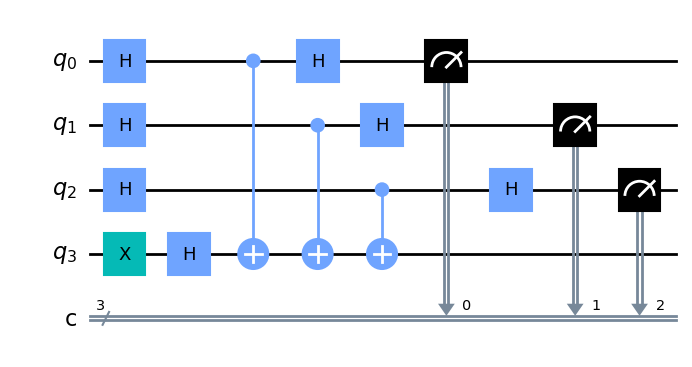

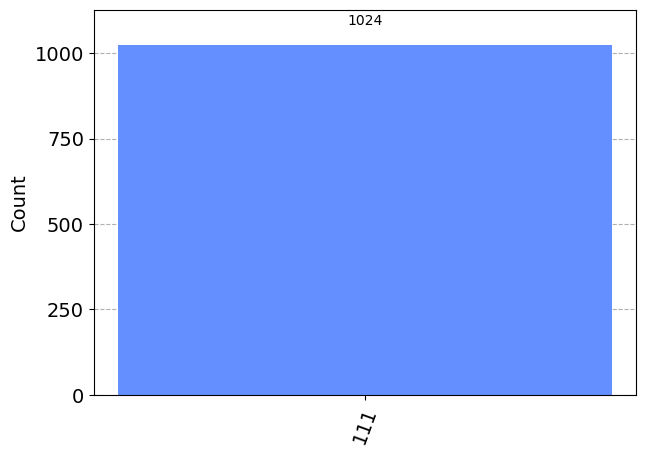

In [20]:
run_deutsch_jozsa(n=3, constant=False, shots=1024)

- If the function is constant, measurement result will be all zeros `(000...0)`
- If the function is balanced, the result will be anything but all zeros

Expected result (for n = 3, balanced):
``` bash
{'011': 130, '101': 125, '110': 132, ...}
```

This means:
- The function is not constant
- The qubits interfered in such a way that `'000'` disappeared - which is the signature of a balanced oracle

Deutsch-Jozsa Algorithm is a common algorithm that to help learners understand terms like: Quantum parallelism, Superposition. Interference.  
It inspired more powerful algorithms like: Simon's algorithm, Shor's algorithm (factoring), Grover's algorithm (search) that would be a field of future research.

### 6. Applications of Quantum Computing

Quantum computing has the potential to revolutionize many fields by solving certain types of problems much faster than classical computers.  
While it's still in early development, I have made a selection of some of the more significant applications of quantum computing - both current and future:

**Cryptography**  
Breaking or securing encryption:
- Shor's Algorithm can factor large numbers efficiently, threatening current encryption (RSA)
- Quantum computers could eventually break traditional public-key cryptography
- Also help develop quantum-safe and quantum key distribution (QKD) for secure communication

**Search and Optimization**  
Searching unsorted databases, solving complex optimization problems:
- Grover’s Algorithm offers a quadratic speedup in database searches
- Useful in:
    - Logistics and supply chain optimization
    - Scheduling
    - Route planning
    - Portfolio optimization
      
**Drug Discovery and Molecular Simulation**  
Simulating molecules at the quantum level:
- Classical computers struggle with modeling molecules with many electrons
- Quantum computers can simulate chemical reactions, helping:
    - Design new drugs and materials
    - Understand protein folding
    - Develop new catalysts

**Industrial Applications**  
Specific to industries (automotive, aerospace, etc.)
- Car manufacturers use quantum computing for:
    - Traffic flow optimization
    - Battery chemistry
- Airlines use it for:
    - Scheduling and gate optimization
- Energy companies explore:
    - Grid optimization
    - Fusion simulation

**Machine Learning & AI**  
Faster learning and pattern recognition:
- Quantum Machine Learning (QML) can speed up training and improve pattern detection
- Potential in:
    - Natural language processing
    - Fraud detection
    - Recommendation systems

**Fundamental Physics & Cosmology**  
Simulating the universe's most complex phenomena:
- Quantum computers can model:
    - Quantum gravity
    - Black hole information
    - High-energy particle interactions

### 7. Discussion & Limitations

Today's classical computers are relatively straightforward. They work with a limited set of inputs and use an algorithm to spit out an answer and the bits that encode the inputs do not share information about one another. Quantum computers are different. For one, when data are input into the qubits, the qubits interact with other qubits, allowing for many different calculations to be run simultaneously, this is why quantum computers can work so much faster than classical computers. But that's not the end of the story. Quantum computers don't deliver just one clear answer like classical computers do, but a range of possible answers.

For calculations that are limited in scope, classical computers are still the preferred tools. But for very complex problems, quantum computers can save time by narrowing down the range of possible answers.

#### Advantages
- Massive parallelism from superposition

A quantum computer doesn't just test one input at a time - it can process many possibilities simultaneously, thanks to superposition.
For n qubits, the system can represent a superposition of $2^n$ states simultaneously.
For example if we find an item in an unsorted database of N items ([Grover's Search Algorithm](https://www.geeksforgeeks.org/introduction-to-grovers-algorithm/)) - Classical computers takes $О(N)$ time while Quantum uses superposition + interference to reduce this to $О(\sqrt{N})$.
It doesn't "check all items at once" - it builds a probability wave that favors the correct result.

- Efficient for specific problems (e.g., factoring, database search)

Quantum computers are not faster for everything, but they can outperform classical computers for a small set of critical problems - often where there's structure to exploit (like periodicity or symmetry) or classical solutions scale exponentially.

Classical factoring (e.g. 2048-bit RSA key) takes exponential time while Quantum ([Shor's algorithm](https://www.geeksforgeeks.org/shors-factorization-algorithm/)) factors integers in polynomial time. Cryptosystems like RSA, Diffie-Hellman, and ECC rely on the hardness of factoring or discrete logs. Quantum computers could break these with Shor's algorithm that is a huge impact on cybersecurity.

Simulating molecules, chemical reactions, or materials at the quantum level is exponentially hard for classical computers, 
Quantum computers naturally model these systems because they follow the same quantum rules.

#### Challenges

- Noisy hardware, Decoherence

Quantum computers operate at the quantum level, where particles like electrons or photons are used to represent data (qubits). These systems are **extremely sensitive**. External influences like heat, magnetic fields, or even slight vibrations can introduce **noise**, which causes **random errors** in computations.
"Decoherence" is the process by which quantum information stored in qubits is lost due to this environmental interference. Qubits need to remain in a delicate quantum state (superposition and entanglement) during computation. Decoherence causes them to lose that state prematurely, making calculations unreliable. 
Quantum systems are inherently unstable and easily disrupted, which makes it hard to maintain accurate operations for long enough to perform useful computations.

- Difficult to scale reliably

Quantum computers are currently built with a small number of qubits. To solve real-world problems (like breaking encryption), we need thousands to millions of qubits. But adding more qubits is technically hard: each one must be precisely controlled and isolated while also interacting with others in a controlled way. More qubits mean more noise, more complexity in the control systems, and more chances for error. Building large-scale quantum computers is extremely challenging because each additional qubit adds significant engineering and error management complexity.

- Error correction is resource-intensive

Quantum computers are very error-prone. Unlike classical computers, you can’t just copy data to protect it (due to the no-cloning theorem in quantum mechanics). Quantum error correction schemes exist, but they require many physical qubits to represent a single logical qubit (a more stable, error-protected unit of quantum information). For example, to protect 1 logical qubit, you might need 1,000+ physical qubits. Managing and correcting these errors in real time is also computationally expensive and adds significant overhead. Keeping quantum computations accurate demands lots of extra hardware and resources, limiting near-term usefulness.

### 8. Conclusion & Next Steps
This article explored the fundamental principles of quantum computing, focusing on both its theoretical foundations and practical simulations. By understanding key concepts such as qubits, superposition, entanglement, quantum gates, and interference, we have demonstrated how quantum mechanics forms the backbone of quantum algorithms like the Deutsch-Jozsa algorithm and simple simulations using tools like Qiskit.

Through hands-on simulations, we visualized how quantum circuits behave differently from classical ones and how quantum computation can process multiple possibilities in parallel. These practical implementations serve as an entry point into understanding how quantum algorithms might outperform classical ones in specific domains.

Quantum computing is not just a fascinating subject - it represents a paradigm shift in how we think about computation, promising breakthroughs in cryptography, chemistry, optimization, machine learning, and beyond.

Quantum computing is still in its infancy, but its potential is immense. Through continued learning, simulation, and innovation, the gap between theory and real-world application is steadily closing.

In my opinion quantum computing improvements will come from cross-disciplinary innovation - combining physics, computer science, materials science, and engineering. Breakthroughs in even one of these areas can accelerate the whole field.

*I hope you found the article interesting and useful.  
If you want develop your intuition for quantum superposition, entanglement, and state manipulation in a fun and practical way, you can also try [QuantumGatesPuzzle](./QuantumGatesPuzzle.ipynb) game*🎮😉

**Future project work:**
- Explore Shor’s algorithm
- Simulate Grover’s algorithm
- Connect simulations to real IBM quantum hardware

*GitHub repo: [Quantum Computing: Foundations and Practical Simulations](https://github.com/nshivachev/MathConceptsForDevelopers/tree/main/RegularExam)*

### 9. References

- M. Nielsen & I. Chuang, *Quantum Computation and Quantum Information*
- [IBM Qiskit Docs](https://qiskit.org/documentation/)
- [Qiskit Textbook](https://qiskit.org/textbook)
- [Deutsch-Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)
- [Mckinsey-explainers](https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-quantum-computing)
- [Beyondtechnology](https://beyondtechnology.net/quantum-computing-what-it-is-how-it-works-and-its-impact-on-the-industry/)
- [Physicsworld](https://physicsworld.com/a/quantum-technology-why-the-future-is-already-on-its-way/)
- [Techtarget](https://www.techtarget.com/whatis/definition/quantum-interference)